# Homework: Football Player Analysis with Viz

เราจะใช้ข้อมูล **Football player dataset** จากเกมส์ FIFA18

Note: ข้อมูลเก่าและไม่อัพเดท, นิสิตต้องรันโค้ดไล่ตามลำดับ มิฉะนั้นอาจจะทำให้ไม่ได้ผลลัพธ์ที่ต้องการ

In [2]:
# First let us import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set the global rc params
plt.rc('figure', figsize=(10, 6))

In [3]:
# Read data
df = pd.read_csv('football_data.csv')
df 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Year_joined
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,Medium/ Medium,Messi,RF,10.0,NaN,2021,5'7,159lbs,226500000.0,2004.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,...,High/ Low,C. Ronaldo,ST,7.0,NaN,2022,6'2,183lbs,127100000.0,2018.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,High/ Medium,Neymar,LW,10.0,NaN,2022,5'9,150lbs,228100000.0,2017.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,...,Medium/ Medium,Lean,GK,1.0,NaN,2020,6'4,168lbs,138600000.0,2011.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,...,High/ High,Normal,RCM,7.0,NaN,2023,5'11,154lbs,196400000.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000,1000,Right,...,Medium/ Medium,Lean,CM,22.0,NaN,2019,5'9,134lbs,143000.0,2017.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000,1000,Right,...,Medium/ Medium,Normal,ST,21.0,NaN,2020,6'3,170lbs,113000.0,2018.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000,1000,Right,...,Medium/ Medium,Normal,ST,33.0,NaN,2021,5'8,148lbs,165000.0,2017.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000,1000,Right,...,Medium/ Medium,Lean,RW,34.0,NaN,2019,5'10,154lbs,143000.0,2018.0


พบเจอรายชื่อนักฟุตบอลที่เราเราคุ้นเคยกันเช่น Messi Ronaldo Neymar เป็นต้น

In [4]:
#What columns do we have
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause', 'Year_joined'],
      dtype='object')

In [5]:
# Show dimensionality of the dataframe
df.shape

(18207, 23)

In [6]:
# Drop rows without year joined
df = df.dropna(subset=['Year_joined'])

In [7]:
# แปลง ID , Jersey Number, และ Year_joined ให้เป็น object
df['ID']=df['ID'].astype('object')
df['Jersey Number'] = df['Jersey Number'].astype('object')
df['Year_joined'] = df['Year_joined'].astype('int')

C:\Users\ireen\AppData\Local\Temp\ipykernel_23040\3161727572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID']=df['ID'].astype('object')
C:\Users\ireen\AppData\Local\Temp\ipykernel_23040\3161727572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jersey Number'] = df['Jersey Number'].astype('object')
C:\Users\ireen\AppData\Local\Temp\ipykernel_23040\3161727572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16654 entries, 0 to 18206
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16654 non-null  object 
 1   Name                      16654 non-null  object 
 2   Age                       16654 non-null  int64  
 3   Nationality               16654 non-null  object 
 4   Overall                   16654 non-null  int64  
 5   Potential                 16654 non-null  int64  
 6   Club                      16654 non-null  object 
 7   Value                     16654 non-null  int64  
 8   Wage                      16654 non-null  int64  
 9   Preferred Foot            16654 non-null  object 
 10  International Reputation  16654 non-null  float64
 11  Weak Foot                 16654 non-null  float64
 12  Skill Moves               16654 non-null  float64
 13  Work Rate                 16654 non-null  object 
 14  Body Type  

แสดงค่าทางสถิติของคอลัมน์ numerics

In [8]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Release Clause,Year_joined
count,16654.000000,16654.000000,16654.000000,1.665400e+04,16654.000000,16654.000000,16654.000000,16654.000000,1.664300e+04,16654.000000
mean,25.236520,66.159841,71.134682,2.441053e+06,9613.906569,1.115047,2.942837,2.349346,4.585061e+06,2016.459829
std,4.732192,7.010730,6.158551,5.719083e+06,22257.090897,0.398879,0.659797,0.755909,1.111872e+07,2.105924
min,16.000000,46.000000,48.000000,0.000000e+00,1000.000000,1.000000,1.000000,1.000000,1.300000e+04,1991.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,2016.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,1.100000e+06,2017.000000
75%,29.000000,71.000000,75.000000,2.000000e+06,8000.000000,1.000000,3.000000,3.000000,3.500000e+06,2018.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,2.281000e+08,2018.000000


จะเห็นว่าโดยเฉลี่ยค่าที่เป็นตัวเลขต่างๆเป็นอย่างไร ทั้งอายุ ค่าเรทติ้ง และสกิลต่างๆ

เรามาเริ่มตอบคำถามเพื่อวิเคราะห์ข้อมูลนักฟุตบอลกัน

**จำนวนนักฟุตบอลมาจากชาติใดมากที่สุด 10 อันดับแรก**

In [10]:
topNations = df['Nationality'].value_counts().head(10)

## Section 1: Using Pandas and Matplotlib

### Exercise 1

นำข้อมูล Top 10 ชาติที่มีจำนวนนักฟุตบอลมาที่สุดด้านบนมาแสดงเป็น Bar Chart

Hint: ใช้ keyword argument 'rot' ในการ rotate ค่าเลเบลบนแกน x ไป 45 องศา ใช้ ylabel ในการกำหนดชื่อแกน y และใช้ 'title' ในการกำหนดชื่อของกราฟ

<Axes: title={'center': 'Top 10 countries with hightest number of football players'}, xlabel='Nationality', ylabel='Number'>

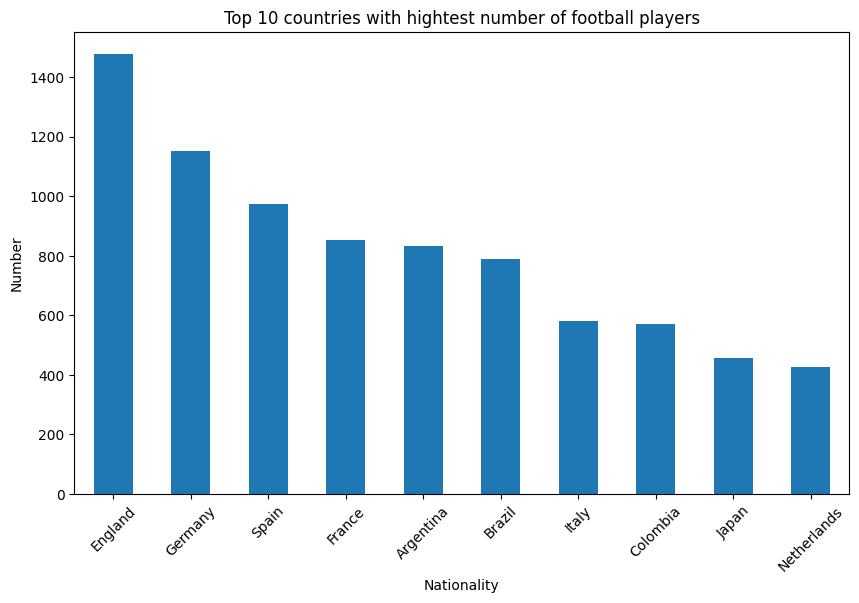

In [10]:
#your code here
topNations.plot(kind='bar' ,ylabel='Number' ,rot=45, title='Top 10 countries with hightest number of football players')

England มีจำนวนนักฟุตบอลมากที่สุดรองลงมาคือ Germany, Spain และ Argentina ตามลำดับ

ต่อมา แยกนักฟุตบอลที่มาจากสโมสร (Club) Manchester United หรือ Liverpool พร้อมเก็บไว้ใน DataFrame ใหม่ชื่อ manu_liv

แสดงคอลัมน์ 'Name','Age','Club','Wage','Value','Release Clause','International Reputation','Overall','Potential'

In [11]:
manu_liv = df[(df['Club']=='Manchester United')|(df['Club']=='Liverpool')]
manu_liv[['Name','Age','Club','Wage','Value','Release Clause','International Reputation','Overall','Potential']]

,Name,Age,Club,Wage,Value,Release Clause,International Reputation,Overall,Potential
3,De Gea,27,Manchester United,260000,72000000,138600000.0,4.0,91,93
26,M. Salah,26,Liverpool,255000,69500000,137300000.0,3.0,88,89
45,P. Pogba,25,Manchester United,210000,64000000,123200000.0,4.0,87,91
47,R. Lukaku,25,Manchester United,230000,62500000,120300000.0,3.0,87,89
58,S. Mané,26,Liverpool,195000,52000000,102700000.0,3.0,86,87
...,...,...,...,...,...,...,...,...,...
14036,N. Phillips,21,Liverpool,9000,425000,1100000.0,1.0,61,74
14252,Rafael Camacho,18,Liverpool,7000,525000,1500000.0,1.0,61,81
14674,B. Adekanye,19,Liverpool,7000,450000,1300000.0,1.0,60,80
15378,K. Grabara,19,Liverpool,3000,280000,707000.0,1.0,59,76


**เรียงลำดับนักฟุตบอลของทั้งสองทีมจากค่าเหนื่อยต่อสัปดาห์ (Wage) จากมากไปน้อย และหากค่าเหนื่อยเท่ากัน ให้เรียงตามมูลค่า (Value) จากมากไปน้อยเช่นเดียวกัน**

In [12]:
top_wage = manu_liv.sort_values(['Wage','Value'],ascending=False)
top_wage[['Name','Age','Club','Wage','Value','Release Clause','International Reputation','Overall','Potential']]

,Name,Age,Club,Wage,Value,Release Clause,International Reputation,Overall,Potential
3,De Gea,27,Manchester United,260000,72000000,138600000.0,4.0,91,93
26,M. Salah,26,Liverpool,255000,69500000,137300000.0,3.0,88,89
47,R. Lukaku,25,Manchester United,230000,62500000,120300000.0,3.0,87,89
93,A. Sánchez,29,Manchester United,215000,37500000,69400000.0,4.0,85,85
45,P. Pogba,25,Manchester United,210000,64000000,123200000.0,4.0,87,91
...,...,...,...,...,...,...,...,...,...
15627,M. Virtue,21,Liverpool,8000,250000,525000.0,1.0,59,71
13961,C. Jones,17,Liverpool,7000,550000,1600000.0,1.0,61,82
14252,Rafael Camacho,18,Liverpool,7000,525000,1500000.0,1.0,61,81
14674,B. Adekanye,19,Liverpool,7000,450000,1300000.0,1.0,60,80


### Exercise 2

นำข้อมูลนักฟุตบอลจากสองทีมที่มีค่าเหนื่อยมากสุด 10 คนข้างต้นมาทำเป็น horizontal bar chart สีแดง

Hint: เนื่องจากมีคอลัมน์มาก ต้องใข้ argument 'x' และ 'y' ในการเลือกคอลัมน์มาแสดงบนกราฟ และเลือกสีด้วย 'color'

<Axes: title={'center': 'Top 10 highest wage of football players in Manchester United and Liverpool'}, ylabel='Name'>

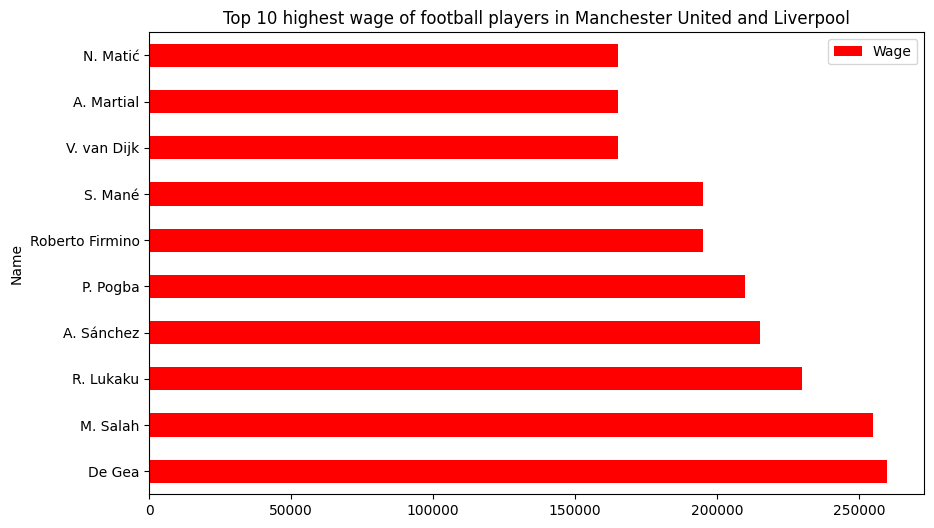

In [13]:
#your code here
top_wage.head(10).plot(kind='barh', x='Name', y='Wage', rot=0, title='Top 10 highest wage of football players in Manchester United and Liverpool',color='red')

(ณ ขณะนั้น) De Gea เป็นนักฟุตบอลที่มีค่าเหนื่อยต่อสัปดาห์สูงที่สุด รองลงมาคือกองหน้า M. Salah และ R. Lukaku

### Exercise 3

แสดง distribution ของค่าเหนื่อยต่อสัปดาห์ของนักฟุตบอลทั้งหมดจากสองทีมนี้ ด้วย histogram

Hint: ต้องเลือกคอลัมน์ Wage เท่านั้น

(array([16.,  4.,  4., 11., 17.,  3.,  4.,  2.,  3.,  2.]),
 array([  3000.,  28700.,  54400.,  80100., 105800., 131500., 157200.,
        182900., 208600., 234300., 260000.]),
 <BarContainer object of 10 artists>)

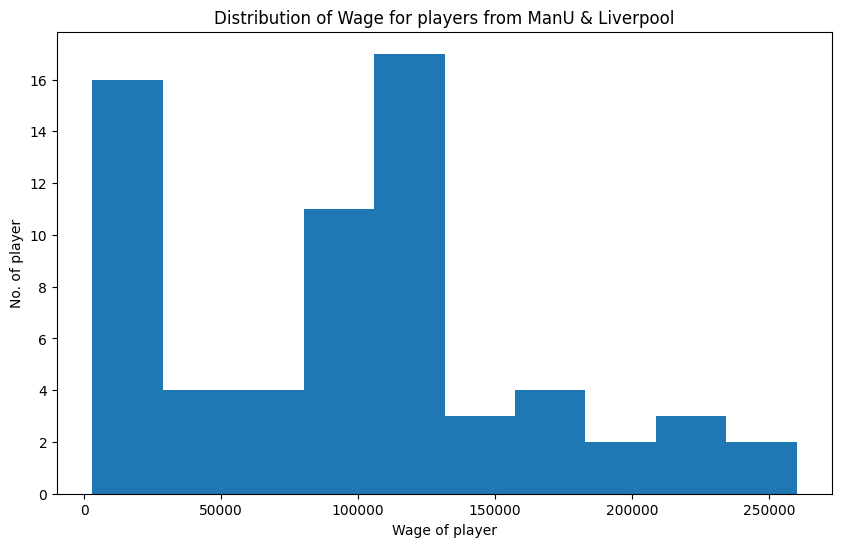

In [14]:
#your code here
plt.title('Distribution of Wage for players from ManU & Liverpool')
plt.ylabel("No. of player")
plt.xlabel("Wage of player")
plt.hist(top_wage['Wage'])

**ค่าเหนื่อยต่อสัปดาห์ของนักฟุตบอลจากสองทีมนี้มีแนวโน้มเพิ่มขึ้นปีต่อปีหรือไม่**

เริ่มจากการหาค่าเฉลี่ยต่อปี ของค่าเหนื่อย

In [15]:
avg_wage_by_year = manu_liv[['Year_joined','Wage']].groupby('Year_joined',as_index=False).mean()
avg_wage_by_year

,Year_joined,Wage
0,2009,120000.000000
1,2010,135000.000000
2,2011,151250.000000
3,2013,91000.000000
4,2014,98545.454545
5,2015,80454.545455
6,2016,96500.000000
7,2017,78307.692308
8,2018,98545.454545


พบว่าไม่จริง ค่าเหนื่อยไม่ได้มีแนวโน้มเพิ่มขึ้นปีต่อปี แต่น่าจะเป็นเพราะจำนวนคนที่เข้ามา joined นั้นมีจำนวนน้อยในช่วงปี 2009 - 2013

In [16]:
manu_liv[['Year_joined','Wage']].groupby('Year_joined',as_index=False).count()

,Year_joined,Wage
0,2009,1
1,2010,2
2,2011,4
3,2013,5
4,2014,11
5,2015,11
6,2016,8
7,2017,13
8,2018,11


### Exercise 4

นำค่าเหนื่อยเฉลี่ยต่อปีมามองเป็น trend ด้วย line chart

<Axes: title={'center': 'Average wage of football players in Manchester United and Liverpool by year'}, xlabel='Year_joined'>

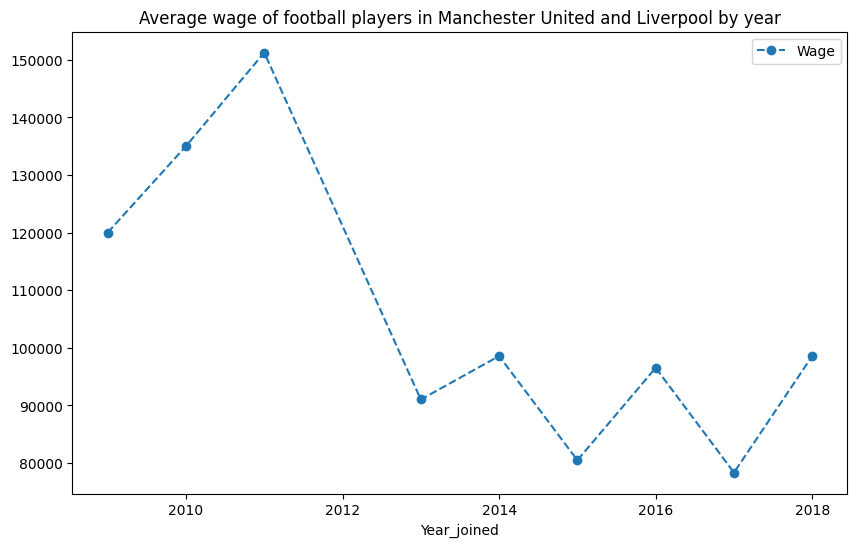

In [17]:
#your code here
avg_wage_by_year.plot(kind='line', x='Year_joined', y='Wage', rot=0, title='Average wage of football players in Manchester United and Liverpool by year',style='o--')

**นับจำนวนของนักฟุตบอลจากสองทีมนี้จากเท้าข้างถนัด (Preferred Foot) พร้อมกับหาค่าเฉลี่ยของค่าเหนื่อยในแต่ละกลุ่มเท้าข้างถนัด**

In [18]:
preferred_foot = manu_liv.groupby('Preferred Foot').agg( Num_preferred_foot = ('Preferred Foot','count'),
                                                      average_wage = ('Wage','mean')
                                                      )
preferred_foot

,Num_preferred_foot,average_wage
Preferred Foot,,
Left,15,108800.000000
Right,51,91392.156863


### Exercise 5

แสดง Pie chart เพื่อให้เห็นสัดส่วนของจำนวนนักฟุตบอลที่ถนัดเท้าซ้ายกับขวา เป็นเปอร์เซ็นต์

Hint: ใช้ argument 'labels' เพื่อใส่ list ของเลเบลลง ณ ตำแหน่ง pie ด้วย labels=['left','right']

<Axes: title={'center': 'Preferred Foot of Players'}, ylabel='Num_preferred_foot'>

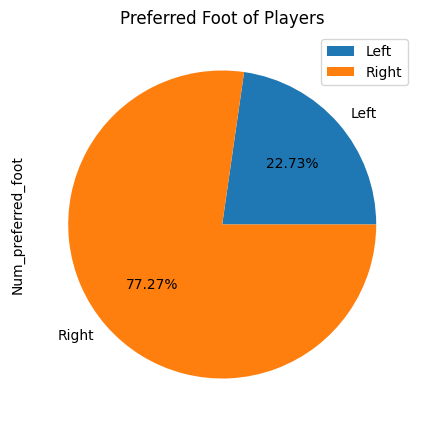

In [19]:
#your code here
preferred_foot.plot.pie(y='Num_preferred_foot', figsize=(5, 5), autopct='%.2f%%', startangle=0, title='Preferred Foot of Players')

**หา correlation ระหว่าง 'Age','Wage','Value','Release Clause','International Reputation','Overall','Potential','Weak Foot','Skill Moves','Year_joined' ของนักฟุตบอลจากทั้งสองทีม**

In [20]:
teams_corr = manu_liv[['Age','Wage','Value','Release Clause','International Reputation','Overall','Potential','Weak Foot','Skill Moves','Year_joined']].corr()
teams_corr

,Age,Wage,Value,Release Clause,International Reputation,Overall,Potential,Weak Foot,Skill Moves,Year_joined
Age,1.000000,0.601221,0.285077,0.265293,0.636667,0.658932,-0.070502,0.058548,-0.082332,-0.361835
Wage,0.601221,1.000000,0.899240,0.889021,0.851018,0.909908,0.588581,0.104778,0.259145,-0.179712
Value,0.285077,0.899240,1.000000,0.999310,0.712990,0.783728,0.749495,0.113392,0.223222,0.045276
Release Clause,0.265293,0.889021,0.999310,1.000000,0.698173,0.777839,0.760552,0.115222,0.223954,0.053125
International Reputation,0.636667,0.851018,0.712990,0.698173,1.000000,0.783121,0.404492,0.017251,0.134879,-0.177880
Overall,0.658932,0.909908,0.783728,0.777839,0.783121,1.000000,0.624103,0.081439,0.209396,-0.228242
Potential,-0.070502,0.588581,0.749495,0.760552,0.404492,0.624103,1.000000,0.067018,0.273068,0.132447
Weak Foot,0.058548,0.104778,0.113392,0.115222,0.017251,0.081439,0.067018,1.000000,0.309438,0.136169
Skill Moves,-0.082332,0.259145,0.223222,0.223954,0.134879,0.209396,0.273068,0.309438,1.000000,0.024749
Year_joined,-0.361835,-0.179712,0.045276,0.053125,-0.177880,-0.228242,0.132447,0.136169,0.024749,1.000000


สังเกตว่า ค่าเหนื่อย (Wage) มีความสัมพันธ์กับ Value, Release Clause,  ชื่อเสียงนานาชาติ (International Reputation) และความสามารถโดยรวม (Overall) ค่อนข้างมาก (pearson correlation > 0.8)

ค่าเหนื่อยมีความสัมพันธ์ปานกลางกับ Age และ Potential

แต่ค่าเหนื่อยไม่มีความสัมพันธ์กับปีที่เข้าร่วม

Value ก็มีความสัมพันธ์เชิงบวกกับค่าต่างๆใกล้เคียงกับ Wage

ในขณะที่คะแนนสกิล Weak Foot และ SKill Moves ยังไม่เห็นความสัมพันธ์กับตัวแปรอื่นมากนัก

## Section 2: Using Seaborn

ต่อไปนี้ให้ใช้ library Seaborn ในการ plot

### Exercise 6

นำ correlation ด้านบน มาทำเป็น heatmap เพื่อความชัดเจน

<Axes: title={'center': 'Correlation of various values and ratings characteristics'}>

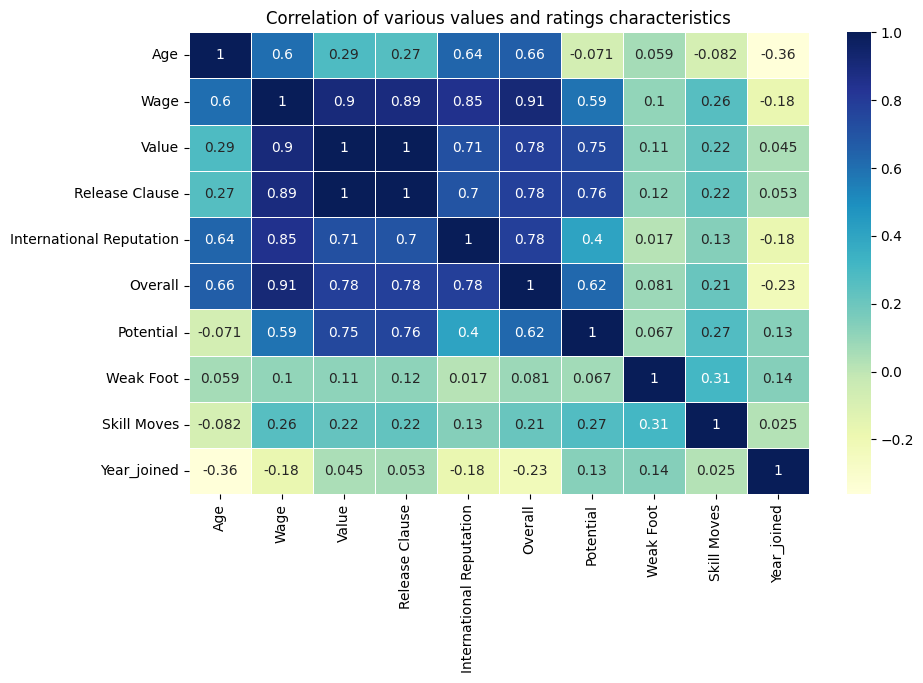

In [21]:
#your code here
# get correlation as a heatmap
plt.title('Correlation of various values and ratings characteristics')
sns.heatmap(teams_corr, annot=True, cmap='YlGnBu', linewidths=.5)


### Exercise 7

สร้าง 4 boxplots ด้วย sns.boxplot() เพื่อเปรียบเทียบ distribution ของค่าเรทติ้ง Overall , Potential และคะแนนสกิล Weak Foot, Skill Moves ของนักฟุตบอลทั้งสองทีม 

การสร้าง subplots และการปรับขนาดได้ทำให้แล้วบางส่วน เหลือเพียงการ plot ลงใน axes ย่อยทั้ง 4 ผ่าน ax=ax[x,y]

Hint: boxplot แรกสร้างให้เป็นตัวอย่างแล้ว

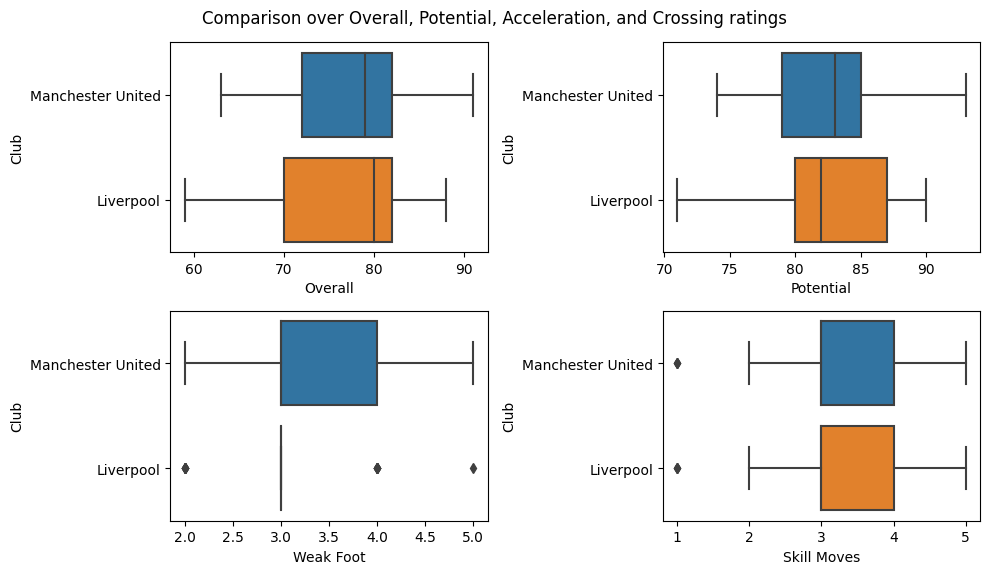

In [22]:
fig, ax = plt.subplots(2,2)
#your code here
sns.boxplot(data=manu_liv,x='Overall',y='Club',ax=ax[0,0],orient='h')
sns.boxplot(data=manu_liv,x='Potential',y='Club',ax=ax[0,1],orient='h')
sns.boxplot(data=manu_liv,x='Weak Foot',y='Club',ax=ax[1,0],orient='h')
sns.boxplot(data=manu_liv,x='Skill Moves',y='Club',ax=ax[1,1],orient='h')


fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # improve subplots spacing
fig.suptitle('Comparison over Overall, Potential, Acceleration, and Crossing ratings') # add the big figure title
plt.show()

จะเห็นว่าจริงๆแล้วค่า median ของ Overall Liverpool ดีกว่า Manchester United เล็กน้อย แต่ Overall ของ United จะเกาะกลุ่มกว่า และมีผู้เล่นที่ Overall สูง

ในขณะที่ค่า median ของ Potential ของ United ก็สูงกว่า Liverpool แต่กลุ่มคน 50% ของ Liverpool มี Potential กว่า United

Weak Foot ของ United มีค่าระหว่าง 3-4 แต่ของ Liverpool จะอยู่ที่ 3 และมีบางคนที่ต่างออกไป

Skill Moves ของทั้งสองทีมใกล้เคียงกัน

### Exercise 8

ใช้ scatter plot แบบ regression plot เพื่อดูความสัมพันธ์ของ Overall rating กับ Wage แยกความแตกต่างของแต่ละทีม

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Wage vs. Overall relationship')

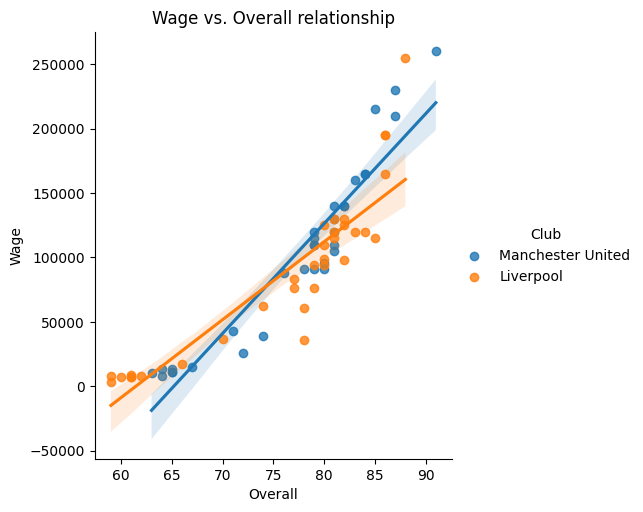

In [23]:
#your code here
sns.lmplot(x='Overall', y='Wage', data=top_wage ,hue='Club')
plt.title('Wage vs. Overall relationship')

โดยภาพรวมแล้ว คะแนนเรทติ้ง Overall เป็นไปในทางเดียวกับค่าเหนื่อยรายสัปดาห์ โดยที่ Manchester United มีค่าเหนื่อยที่แพงกว่า Liverpool ที่เรทติ้งเดียวกัน ดูได้จากเส้นสีน้ำเงินที่สูงกว่าสีส้ม

### Exercise 9

ชื่อเสียงในระดับนานาชาติที่ต่างกัน (ระดับ 1, 2, 3, และ 4) มีแนวโน้มทำให้ค่าเหนื่อยต่างกันหรือไม่

ใช้ catplot แยกแท่งของทีมตามสี ให้ Manchester United สีดำ และ Liverpool สีแดง 

Hint: ใช้ parameter palette=[list of colors] ในการตั้งค่าสี

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Average wage by reputation of players')

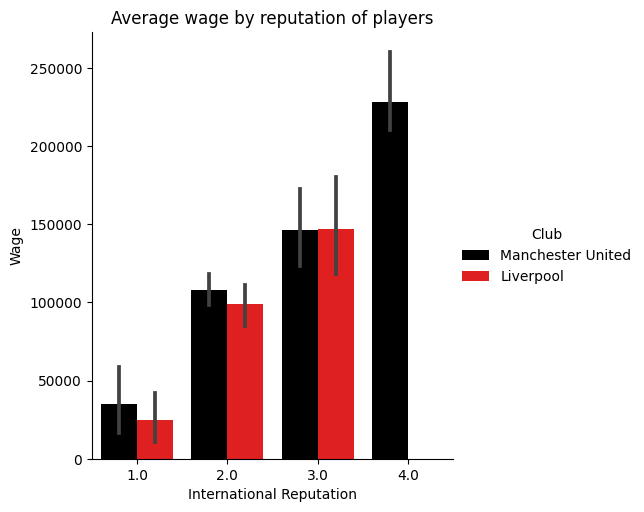

In [24]:
#your code here
sns.catplot(data=manu_liv,x='International Reputation',y='Wage',palette=['black','red'],kind='bar',hue='Club')
plt.title("Average wage by reputation of players")

ดูแล้วค่าเหนื่อยน่าจะมีผลพวงจากชื่อเสียงในระดับนานาชาติอยู่จริงๆ แสดงให้เห็นว่าทั้งสองทีม มีค่าเหนื่อยเฉลี่ยที่สูงกว่าหากชื่อเสียงดีกว่า 

### Exercise 10

ต่อจากข้อข้างบน แล้วหากเพิ่มมุมมองเท้าข้างถนัด (Preferred Foot) กับ ชื่อเสียงในระดับนานาชาติที่ต่างกัน (ระดับ 1, 2, 3, และ 4) มีแนวโน้มทำให้ค่าเหนื่อยต่างกันหรือไม่ เลือกใช้เป็น Catplot แบบ Swarm (kind='swarm') จะเห็นรายละเอียดจุดมากกว่า

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


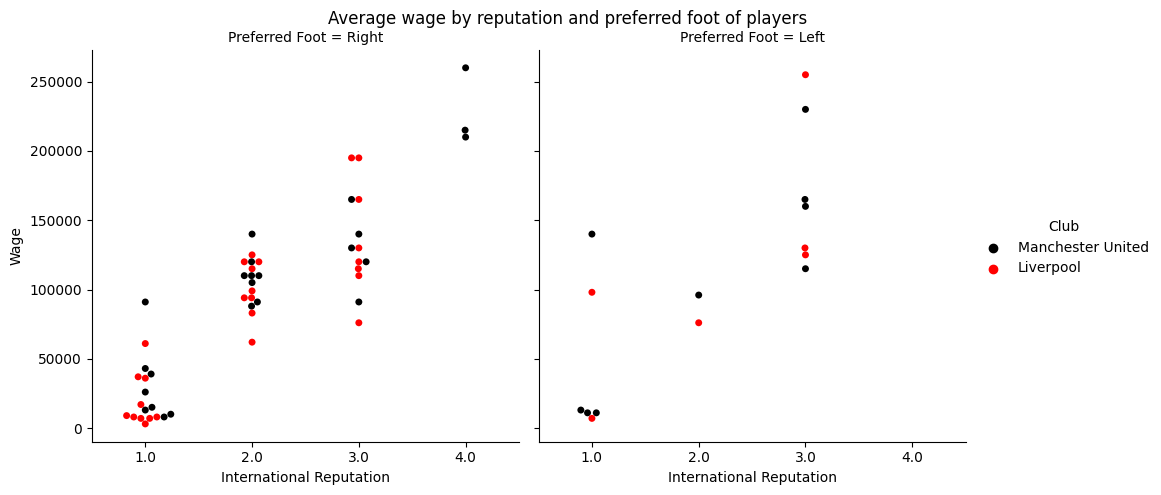

In [25]:
#your code here
g = sns.catplot(x="International Reputation", y="Wage",col='Preferred Foot', hue="Club", data=top_wage, kind="swarm",palette=['black','red'])

# Title and space between subplots are problematic in seaborn
g.fig.suptitle("Average wage by reputation and preferred foot of players")
g.fig.subplots_adjust(top=.9)

ดูแล้วค่าเหนื่อยน่าจะมีผลพวงจากชื่อเสียงในระดับนานาชาติอยู่จริงๆ ในผู้ถนัดเท้าข้างขวา แต่สำหรับเท้าข้างซ้ายมีความแปลก ที่ระดับ 1 และ 2 มีคนที่ International Reputation ระดับ 1 ที่ Wage สูงกว่า 2 ค่อนข้างมาก